# Dependency Installation

In [1]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastai.vision.widgets import *

# Dataset Download Process

In [4]:
fruits = [{'en':'avocado', 'id': 'alpukat'},
          {'en':'grape', 'id': 'anggur'},
          {'en':'apple', 'id': 'apel'},
          {'en':'star fruit', 'id': 'belimbing'},
          {'en':'Dragon fruit', 'id': 'buah naga'},
          {'en':'pomegranate', 'id': 'delima'},
          {'en':'durian', 'id': 'durian'},
          {'en':'orange', 'id': 'jeruk'},
          {'en':'kiwi', 'id': 'kiwi'},
          {'en':'lemon', 'id': 'lemon'},
          {'en':'mango', 'id': 'mangga'},
          {'en':'mangosteen', 'id': 'manggis'},
          {'en':'melon', 'id': 'melon'},
          {'en':'pineapple', 'id': 'nanas'},
          {'en':'pear', 'id': 'pir'},
          {'en':'banana', 'id': 'pisang'},
          {'en':'rambutan', 'id': 'rambutan'},
          {'en':'snakefruit', 'id': 'salak'},
          {'en':'watermelon', 'id': 'semangka'},
          {'en':'srikaya', 'id': 'srikaya'},
          {'en':'strawberry', 'id': 'stroberi'}]

path = Path('FruitClassifier')


if not path.exists():
    path.mkdir()
    for name in fruits:
        dest = path/name['id']
        dest.mkdir(exist_ok=True)
        results = ddg_images(f"{name['en']} fruit", max_results=100)
        urls = list(map(lambda result: result['image'], results))
        download_images(dest, urls=urls)

In [ ]:
images_path = get_image_files(path)
failed = verify_images(images_path)
failed.map(Path.unlink)
failed

(#35) [Path('FruitClassifier/apel/be1275e2-25c2-4c60-8466-d07c2192e275.jpg'),Path('FruitClassifier/apel/09d9c507-32c9-47da-9337-8e398858a0e5.jpg'),Path('FruitClassifier/anggur/47827762-a7ca-4e2f-b91a-495850ddfc66.jpg'),Path('FruitClassifier/kiwi/997d74c3-449a-456d-98ca-da3493a15227.jpg'),Path('FruitClassifier/kiwi/8bdcea7a-869e-47b3-85bb-178dab20d0c9.png'),Path('FruitClassifier/kiwi/40c8f165-5204-4127-9d95-574151333870.jpg'),Path('FruitClassifier/mangga/35771a75-2e92-415b-91af-4664be89aa59.jpg'),Path('FruitClassifier/durian/6706607b-25f0-4878-8700-694911df2295.jpg'),Path('FruitClassifier/manggis/9a0d9987-43dc-406c-8bc6-8f3aadccb47f.jpg'),Path('FruitClassifier/manggis/ec463a6b-f529-439c-8bf0-75b034232ff6.jpg')...]

# Model Training

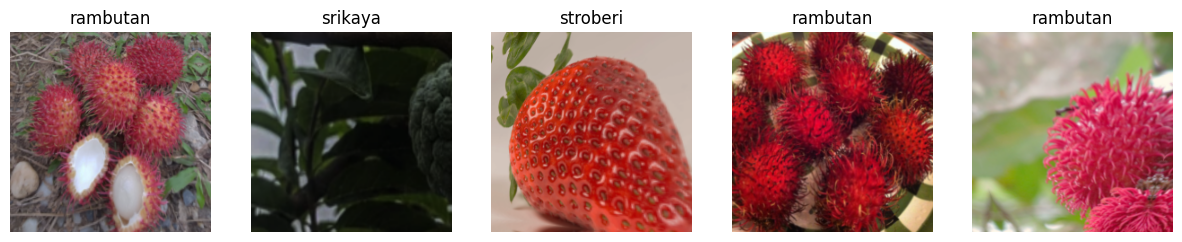

In [ ]:
# GrandparentSplitter(train_name='train', valid_name='valid')
path = Path('FruitClassifier')

fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224),
    batch_tfms=aug_transforms(mult=2)
)

dls = fruits.dataloaders(path, bs=50)
dls.train.show_batch(max_n=5, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, error_rate])
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.019460,0.790745,0.776836,0.223164,01:58


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.289749,0.686085,0.816384,0.183616,02:01
1,1.135261,0.559661,0.850282,0.149718,02:00
2,0.971772,0.483872,0.887006,0.112994,02:00
3,0.843008,0.450756,0.887006,0.112994,01:59
4,0.712786,0.435191,0.889831,0.110170,01:58
5,0.626852,0.417277,0.906780,0.093220,01:57
6,0.550668,0.480771,0.884181,0.115819,02:00
7,0.504664,0.467992,0.906780,0.093220,01:58
8,0.443734,0.425445,0.901130,0.098870,01:58
9,0.408368,0.458316,0.906780,0.093220,02:00


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes sh

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


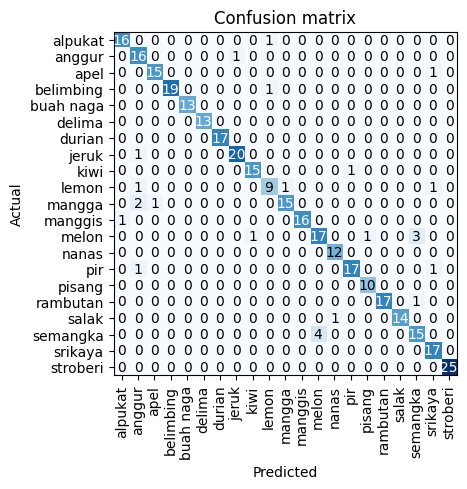

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

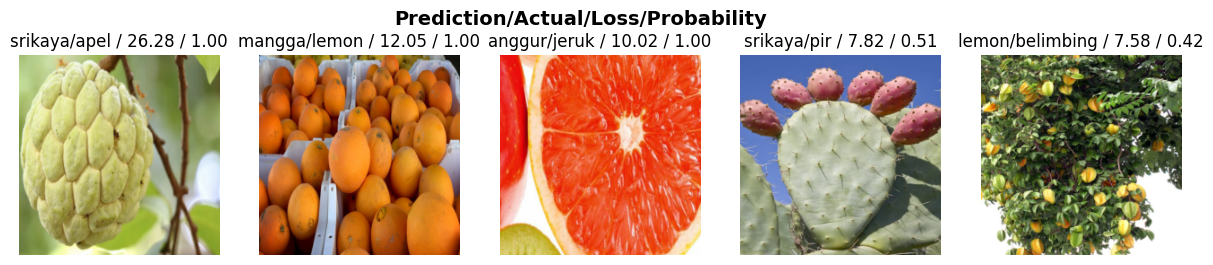

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export('model.pkl')